<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [1]:
!nvidia-smi

Sat Jan 25 12:11:12 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Install TensorFlow and TensorFlow Model Garden

In [2]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0 (from 0)
Receiving objects: 100% (2650/2650), 34.02 MiB | 30.08 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is in

## Restart the Runtime

**Note**
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
# from official.nlp import optimization

In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.17.1
Eager mode:  True
Hub version:  0.16.1
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [4]:
import pandas as pd
df = pd.read_csv('ei.csv',skiprows=[410473])
df.head()

,EI,posts
0,I,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,I,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,I,enfp and intj moments https://www.youtube.com...
3,I,What has been the most life-changing experienc...
4,I,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...


In [5]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['EI_encoded'] = label_encoder.fit_transform(df['EI'])

print("Original Categories:", df['EI'].unique())
print("Encoded Labels:", df['EI_encoded'].unique())

decoded_categories = label_encoder.inverse_transform(df['EI_encoded'])
print("Decoded Categories:", decoded_categories)
df.head()

Original Categories: ['I' 'E']
Encoded Labels: [1 0]
Decoded Categories: ['I' 'I' 'I' ... 'I' 'I' 'I']


,EI,posts,EI_encoded
0,I,'http://www.youtube.com/watch?v=qsXHcwe3krw,1
1,I,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,1
2,I,enfp and intj moments https://www.youtube.com...,1
3,I,What has been the most life-changing experienc...,1
4,I,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,1


<Axes: title={'center': 'Target Distribution'}, ylabel='Frequency'>

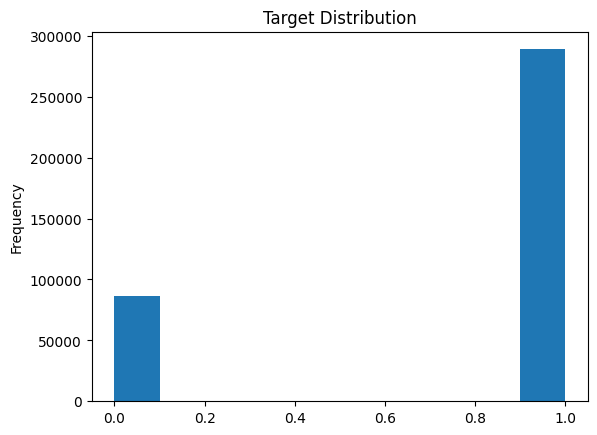

In [6]:
df.EI_encoded.plot(kind='hist', title='Target Distribution')

In [7]:
from sklearn.model_selection import train_test_split

train_df, remaining = train_test_split(df, random_state=42, train_size=0.0075, stratify=df.EI_encoded.values)
valid_df, _ = train_test_split(remaining, random_state=42, train_size=0.00075, stratify=remaining.EI_encoded.values)
train_df.shape, valid_df.shape

((2817, 3), (279, 3))

In [8]:
print(train_df['posts'].dtypes)
print(train_df['EI_encoded'].dtypes)


object
int64


In [9]:
print(train_df['posts'].isnull().sum())  # Check for missing values
print(train_df['posts'].apply(lambda x: isinstance(x, str)).all())  # Check if all entries are strings


3
False


In [10]:
train_df.loc[:, 'posts'] = train_df['posts'].astype(str)  # Convert all to strings
train_df = train_df.copy()  # Make a copy of the DataFrame to avoid SettingWithCopyWarning
train_df['posts'] = train_df['posts'].astype(str)  # Convert all to strings


In [11]:
print(train_df['EI_encoded'].unique())
print(train_df['EI_encoded'].dtype)


[0 1]
int64


In [12]:
train_df['EI_encoded'] = train_df['EI_encoded'].astype(int)
train_df = train_df.copy()
train_df['EI_encoded'] = train_df['EI_encoded'].astype(int)
# Convert the 'posts' column to string type
train_df['posts'] = train_df['posts'].astype(str)
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['posts'].values, train_df['EI_encoded'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((train_df['posts'].values, train_df['EI_encoded'].values))
  for text,label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b"I don't keep letters from my exes, i see them as just lies. I keep the good things of those people in my heart.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 4: Create tf.data.Datasets for Training and Evaluation

In [ ]:
with tf.device('/cpu:0'):


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [13]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

 # Label categories
 # maximum length of (token) input sequences
label_list = [0,1]
max_seq_length = 128
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)


In [14]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [15]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [16]:
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid=None,
                                            text_a = text.numpy(),
                                            text_b = None,
                                            label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                                       max_seq_length, tokenizer)
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)



You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [17]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])
  x = {
      "input_word_ids": input_ids,
      "input_mask": input_mask,
      "segment_ids": segment_ids
  }
  return (x, label_id)




## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [18]:
with tf.device('cpu:0'):
  train_data = train_data.map(to_feature_map,
                                num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                          .shuffle(1000) \
                          .batch(32, drop_remainder=True) \
                          .prefetch(tf.data.experimental.AUTOTUNE)
  valid_data = valid_data.map(to_feature_map,
                                num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                            .batch(32, drop_remainder=True) \
                            .prefetch(tf.data.experimental.AUTOTUNE)


## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

## Task 10: Fine-Tune BERT for Text Classification

In [19]:
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model

# Define max sequence length
max_seq_length = 128

# Create a custom Keras layer to wrap the TFBertModel
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert_model = TFBertModel.from_pretrained("bert-base-uncased")

    def call(self, inputs):
        input_word_ids, input_mask, segment_ids = inputs
        bert_output = self.bert_model(
            input_ids=input_word_ids,  # No need for tf.identity here
            attention_mask=input_mask,  # No need for tf.identity here
            token_type_ids=segment_ids   # No need for tf.identity here
        )
        return bert_output.pooler_output  # Return the pooled output

def create_model():
    # Define input layers
    input_word_ids = Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

    # Create an instance of the custom BertLayer
    bert_layer = BertLayer()(inputs=[input_word_ids, input_mask, segment_ids])
    #bert_layer = BertLayer()([input_word_ids, input_mask, segment_ids])

    # Add dropout layer
    dropout = Dropout(0.4)(bert_layer)

    # Add a dense layer for binary classification
    output = Dense(1, activation="sigmoid", name="output")(dropout)

    # Create the model
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=output)
    return model

model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.AUC(), 'accuracy'] # Add 'binary_accuracy' here
)

model.summary()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_word_ids            │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_mask (InputLayer)   │ (None, 128)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ segment_ids (InputLayer)  │ (None, 128)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 768)            │              0 │ input_word_ids[0][0],  │
│                           │                        │                │ input_mask[0][0],      │
│                           │                        │                │ segment_ids[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 768)            │              0 │ bert_layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │            769 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

## Task 11: Evaluate the BERT Text Classification Model

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

Epoch 1/3
88/88 ━━━━━━━━━━━━━━━━━━━━ 81s 696ms/step - accuracy: 0.3489 - auc: 0.5236 - loss: 0.9210 - val_accuracy: 0.3629 - val_auc: 0.4921 - val_loss: 0.7328
Epoch 2/3
88/88 ━━━━━━━━━━━━━━━━━━━━ 40s 452ms/step - accuracy: 0.5180 - auc: 0.4983 - loss: 0.7386 - val_accuracy: 0.7486 - val_auc: 0.4910 - val_loss: 0.6250
Epoch 3/3
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 474ms/step - accuracy: 0.6300 - auc: 0.4988 - loss: 0.6521 - val_accuracy: 0.7688 - val_auc: 0.4903 - val_loss: 0.5758


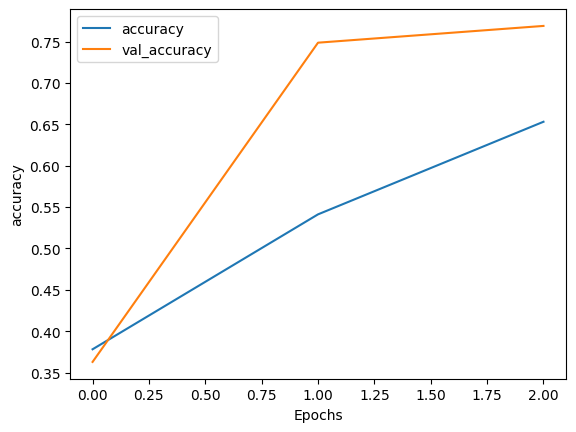

In [21]:
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=3)
plot_graphs(history, 'accuracy')  # Ch

In [22]:
# Save the trained model
model.save('my_model_EI.keras')

### extrovert - GPT

In [24]:
import tensorflow as tf

sample_example = [
    "I feel most energized when I’m surrounded by people and engaging in lively conversations.",
    "Networking events are my favorite opportunities to meet new people and share ideas.",
    "I love being the one to plan gatherings and ensure everyone is having a great time.",
    "Brainstorming sessions with a group always lead to the best and most creative ideas.",
    "I thrive in environments where I can collaborate and interact with others.",
    "Meeting new people and learning about their stories always excites me.",
    "I can’t imagine spending an entire weekend alone—I need to be out and about.",
    "I enjoy speaking up in meetings and contributing to the discussion.",
    "Exploring new places with friends is much more fun than going alone.",
    "I find energy in being the center of attention and making others laugh or smile."
]



test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0] * len(sample_example)))
test_data = test_data.map(to_feature_map).batch(1)
preds = model.predict(test_data)
threshold_value = 0.5

extrovert_score = 0
for idx, pred in enumerate(preds):
    label = 'E' if pred >= threshold_value else 'I'
    print(f"Sentence {idx + 1}: {sample_example[idx]}")
    print(f"Prediction: {label}, Score: {pred[0]}")
    if label == 'E':
        extrovert_score += 1

print(f"\nTotal Extrovert Predictions (E): {extrovert_score}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Sentence 1: I feel most energized when I’m surrounded by people and engaging in lively conversations.
Prediction: E, Score: 0.6632649898529053
Sentence 2: Networking events are my favorite opportunities to meet new people and share ideas.
Prediction: E, Score: 0.5538415908813477
Sentence 3: I love being the one to plan gatherings and ensure everyone is having a great time.
Prediction: E, Score: 0.6637789011001587
Sentence 4: Brainstorming sessions with a group always lead to the best and most creative ideas.
Prediction: E, Score: 0.5846208930015564
Sentence 5: I thrive in environments where I can collaborate and interact with others.
Prediction: E, Score: 0.5846208930015564
Sentence 6: Meeting new people and learning about their stories always excites me.
Prediction: E, Score: 0.6759790778160095
Sentence 7: I can’t imagine spending an entire weekend alone—I need to be out and about.
Prediction: E, Score: 0.6473987102508545
Sentence 8: I enjoy spe

## INTROVERT GPT

In [26]:
import tensorflow as tf

sample_example = [
    "I feel most energized when I’m surrounded by people and engaging in lively conversations.",
    "Networking events are my favorite opportunities to meet new people and share ideas.",
    "I love being the one to plan gatherings and ensure everyone is having a great time.",
    "Brainstorming sessions with a group always lead to the best and most creative ideas.",
    "I thrive in environments where I can collaborate and interact with others.",
    "Meeting new people and learning about their stories always excites me.",
    "I can’t imagine spending an entire weekend alone—I need to be out and about.",
    "I enjoy speaking up in meetings and contributing to the discussion.",
    "Exploring new places with friends is much more fun than going alone.",
    "I find energy in being the center of attention and making others laugh or smile."
]

test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0] * len(sample_example)))
test_data = test_data.map(to_feature_map).batch(1)
preds = model.predict(test_data)
threshold_value = 0.5
introvert_score = 0
for idx, pred in enumerate(preds):
    label = 'E' if pred >= threshold_value else 'I'
    print(f"Sentence {idx + 1}: {sample_example[idx]}")
    print(f"Prediction: {label}, Score: {pred[0]}")
    if label == 'I':
        introvert_score += 1

print(f"\nTotal Introvert Predictions (I): {introvert_score}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Sentence 1: I feel most energized when I’m surrounded by people and engaging in lively conversations.
Prediction: E, Score: 0.6632649898529053
Sentence 2: Networking events are my favorite opportunities to meet new people and share ideas.
Prediction: E, Score: 0.5538415908813477
Sentence 3: I love being the one to plan gatherings and ensure everyone is having a great time.
Prediction: E, Score: 0.6637789011001587
Sentence 4: Brainstorming sessions with a group always lead to the best and most creative ideas.
Prediction: E, Score: 0.5846208930015564
Sentence 5: I thrive in environments where I can collaborate and interact with others.
Prediction: E, Score: 0.5846208930015564
Sentence 6: Meeting new people and learning about their stories always excites me.
Prediction: E, Score: 0.6759790778160095
Sentence 7: I can’t imagine spending an entire weekend alone—I need to be out and about.
Prediction: E, Score: 0.6473987102508545
Sentence 8: I enjoy spe

### EXTROVERT Gemini

In [28]:
import tensorflow as tf

sample_example = [
    "I thrive in social situations and enjoy being around people.",
    "I find energy in interacting with others and feel drained when alone for too long.",
    "I'm often the life of the party and enjoy being the center of attention.",
    "I prefer to work in teams and enjoy collaborating on projects.",
    "I'm outgoing and have a wide circle of friends and acquaintances.",
    "I express myself openly and enjoy sharing my thoughts and feelings with others.",
    "I find it easy to strike up conversations with strangers.",
    "I prefer to process information by talking it out with others.",
    "I get bored easily when I'm not engaged in social activities.",
    "I often find myself drawn to careers that involve interacting with people."
]

test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0] * len(sample_example)))
test_data = test_data.map(to_feature_map).batch(1)
preds = model.predict(test_data)
threshold_value = 0.5

extrovert_score = 0
for idx, pred in enumerate(preds):
    label = 'E' if pred >= threshold_value else 'I'
    print(f"Sentence {idx + 1}: {sample_example[idx]}")
    print(f"Prediction: {label}, Score: {pred[0]}")
    if label == 'E':
        extrovert_score += 1

print(f"\nTotal Extrovert Predictions (E): {extrovert_score}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Sentence 1: I thrive in social situations and enjoy being around people.
Prediction: E, Score: 0.5846208930015564
Sentence 2: I find energy in interacting with others and feel drained when alone for too long.
Prediction: E, Score: 0.5688904523849487
Sentence 3: I'm often the life of the party and enjoy being the center of attention.
Prediction: E, Score: 0.6759790778160095
Sentence 4: I prefer to work in teams and enjoy collaborating on projects.
Prediction: E, Score: 0.6507618427276611
Sentence 5: I'm outgoing and have a wide circle of friends and acquaintances.
Prediction: E, Score: 0.6785407662391663
Sentence 6: I express myself openly and enjoy sharing my thoughts and feelings with others.
Prediction: E, Score: 0.6161718368530273
Sentence 7: I find it easy to strike up conversations with strangers.
Prediction: E, Score: 0.6392880082130432
Sentence 8: I prefer to process information by talking it out with others.
Prediction: E, Score: 0.584620

### introvert Gemini

In [29]:
import tensorflow as tf

sample_example = [
    "I gain energy from spending time alone and find social situations draining.",
    "I prefer to work independently and find it difficult to concentrate in noisy environments.",
    "I enjoy deep conversations with a few close friends rather than large gatherings.",
    "I need quiet time to recharge after social interactions.",
    "I prefer to express myself through writing or other creative outlets.",
    "I find it difficult to small talk and prefer meaningful conversations.",
    "I often need time to process information before sharing my thoughts.",
    "I value my alone time and find it essential for my well-being.",
    "I prefer to work on projects in a quiet and distraction-free environment.",
    "I find it easier to connect with people on a deeper level in one-on-one settings."
]

test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0] * len(sample_example)))
test_data = test_data.map(to_feature_map).batch(1)
preds = model.predict(test_data)
threshold_value = 0.5
introvert_score = 0
for idx, pred in enumerate(preds):
    label = 'E' if pred >= threshold_value else 'I'
    print(f"Sentence {idx + 1}: {sample_example[idx]}")
    print(f"Prediction: {label}, Score: {pred[0]}")
    if label == 'I':
        introvert_score += 1

print(f"\nTotal Introvert Predictions (I): {introvert_score}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Sentence 1: I gain energy from spending time alone and find social situations draining.
Prediction: E, Score: 0.6895738840103149
Sentence 2: I prefer to work independently and find it difficult to concentrate in noisy environments.
Prediction: E, Score: 0.6785407662391663
Sentence 3: I enjoy deep conversations with a few close friends rather than large gatherings.
Prediction: E, Score: 0.6785407662391663
Sentence 4: I need quiet time to recharge after social interactions.
Prediction: E, Score: 0.6473987102508545
Sentence 5: I prefer to express myself through writing or other creative outlets.
Prediction: E, Score: 0.6759790778160095
Sentence 6: I find it difficult to small talk and prefer meaningful conversations.
Prediction: E, Score: 0.6392880082130432
Sentence 7: I often need time to process information before sharing my thoughts.
Prediction: E, Score: 0.6507618427276611
Sentence 8: I value my alone time and find it essential for my well-being